In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
conn = psycopg2.connect(
    host="localhost",
    database="Class Insights",
    user="postgres",
    password="299792458",
    port="5432"
)


In [7]:
query = """
SELECT student_id, name,
       AVG(marks) AS avg_marks,
       AVG(attendance_percent) AS avg_attendance,
       SUM(marks) AS total_marks
FROM class_insight
GROUP BY student_id, name
"""

df = pd.read_sql(query, conn)
df.head()

C:\Users\Mayank saini\AppData\Local\Temp\ipykernel_28344\743983803.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,student_id,name,avg_marks,avg_attendance,total_marks
0,43,Student_43,73.00,70.50,292
1,46,Student_46,67.00,72.25,268
2,10,Student_10,72.00,81.50,288
3,50,Student_50,57.75,82.00,231
4,44,Student_44,72.25,79.50,289


In [8]:
df.isnull().sum()

# Create Grade column
def grade(m):
    if m >= 75:
        return "A"
    elif m >= 60:
        return "B"
    elif m >= 40:
        return "C"
    else:
        return "Fail"

df["grade"] = df["avg_marks"].apply(grade)

df.head()

,student_id,name,avg_marks,avg_attendance,total_marks,grade
0,43,Student_43,73.00,70.50,292,B
1,46,Student_46,67.00,72.25,268,B
2,10,Student_10,72.00,81.50,288,B
3,50,Student_50,57.75,82.00,231,C
4,44,Student_44,72.25,79.50,289,B


In [10]:
print("Mean Marks:", df["avg_marks"].mean())
print("Median Marks:", df["avg_marks"].median())
print("Standard Deviation:", round(df["avg_marks"].std(),2))

pass_ratio = (df["grade"] != "Fail").mean() * 100
print("Pass Percentage:", pass_ratio)

Mean Marks: 67.425
Median Marks: 68.125
Standard Deviation: 10.14
Pass Percentage: 100.0


Text(0, 0.5, 'Average Marks')

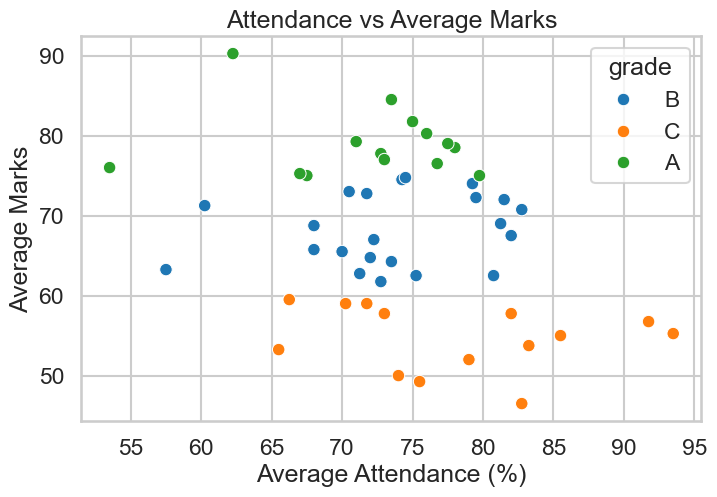

In [15]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="avg_attendance",
    y="avg_marks",
    hue="grade",   # adds insight layer
    data=df
)
plt.title("Attendance vs Average Marks")
plt.xlabel("Average Attendance (%)")
plt.ylabel("Average Marks")


Text(0, 0.5, 'Number of Students')

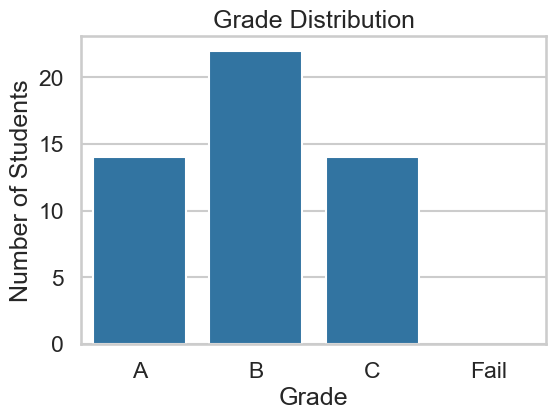

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="grade", data=df, order=["A","B","C","Fail"])
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Number of Students")

Text(0, 0.5, 'Student Name')

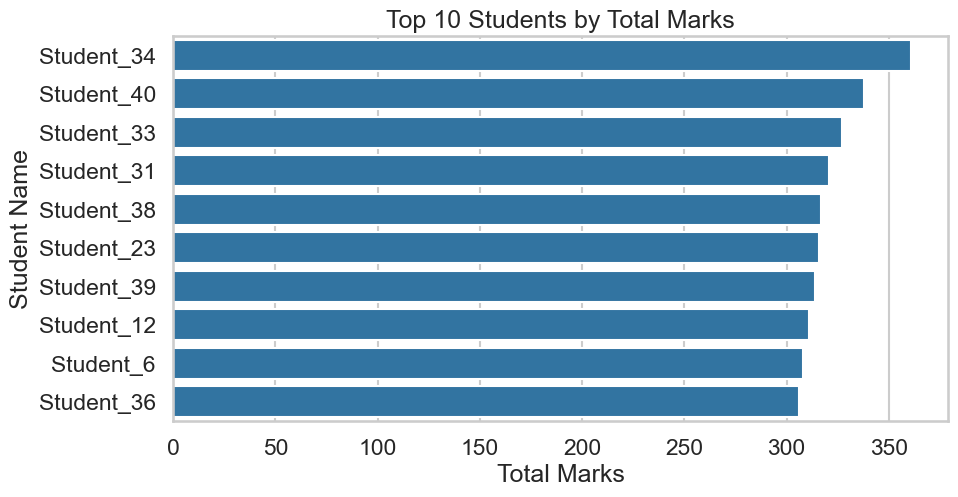

In [17]:
top10 = df.sort_values(by="total_marks", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x="total_marks",
    y="name",
    data=top10
)
plt.title("Top 10 Students by Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Student Name")
